#### 0  Intro

#### 🌡️ Extreme Temperatures

Paris → 75  
Lyon → 69  
Bordeaux → 33  
Marseille → 13  

We deliberately use daily data rather than hourly data because daily extremes are the standard basis 
for climate and public-health heat indicators, while hourly data would substantially increase 
complexity without improving robustness or interpretability for this project. Daily temperature profiles 
could be used once heatwaves are IDed.  


#### 1  Import libraries

In [1]:
#math libraries
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#other
import os



#### 2 Functions

In [2]:
# define path for raw data
def load_city_data(path):
    """
    Load a Meteo-France CSV file and parse the date column.
    """
    df = pd.read_csv(path, sep=";")
    df.columns = df.columns.astype(str).str.strip()
    df["date"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["date"])
    df = df.drop('AAAAMMJJ', axis=1) # delete as AAAAMMJJ == date
    return df


# Select the top 5 meteo stations per city
def select_top_stations(df, min_tx_days=8000, min_end_year=2015, n_stations=5):
    """
    Select the best weather stations based on:
    - number of available TX (daily max temperature) values
    - recent data availability
    """
    summary = (
        df.groupby(["NUM_POSTE", "NOM_USUEL"])
          .agg(
              n_TX=("TX", "count"),
              start_date=("date", "min"),
              end_date=("date", "max")
          )
          .reset_index()
    )

    selected = (
        summary[
            (summary["n_TX"] >= min_tx_days) &
            (summary["end_date"].dt.year >= min_end_year)
        ]
        .sort_values("n_TX", ascending=False)
        .head(n_stations)
    )

    return selected


# Filter results by city/stations
def filter_city_by_stations(df, stations_df):
    """
    Keep only observations from the selected stations.
    """
    station_ids = stations_df["NUM_POSTE"].tolist()
    return df[df["NUM_POSTE"].isin(station_ids)].copy()


In [3]:
# =========================
# Base path to data folder.
# =========================
DATA_DIR = "../data/0_initial"

# =========================
# File paths
# =========================
PATH_75 = f"{DATA_DIR}/Paris_Q_75_previous-1950-2024_RR-T-Vent.zip"
PATH_13 = f"{DATA_DIR}/Marseille_Q_13_previous-1950-2024_RR-T-Vent.zip"
PATH_33 = f"{DATA_DIR}/Bordeaux_Q_33_previous-1950-2024_RR-T-Vent.zip"
PATH_69 = f"{DATA_DIR}/Lyon_Q_69_previous-1950-2024_RR-T-Vent.zip"

# =========================
# Load data
# =========================
df_75 = load_city_data(PATH_75)
df_13 = load_city_data(PATH_13)
df_33 = load_city_data(PATH_33)
df_69 = load_city_data(PATH_69)


# =========================
# Preview data
# =========================
print('Paris')
display(df_75.head())
display(df_75.columns)
print('Marseille')
display(df_13.head())
display(df_13.columns)
print('Bordeaux')
display(df_33.head())
display(df_33.columns)
print('Lyon')
display(df_69.head())
display(df_69.columns)

Paris


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,75101001,INNOCENTS,48.860667,2.348333,37,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01
1,75101001,INNOCENTS,48.860667,2.348333,37,1.8,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-02
2,75101001,INNOCENTS,48.860667,2.348333,37,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-03
3,75101001,INNOCENTS,48.860667,2.348333,37,0.2,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-04
4,75101001,INNOCENTS,48.860667,2.348333,37,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Marseille


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-01
1,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-02
2,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-03
3,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-04
4,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Bordeaux


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-15
1,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-16
2,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-17
3,33004001,AMBES,45.041667,-0.608333,5,21.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-18
4,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-19


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Lyon


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-01
1,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-02
2,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-03
3,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-04
4,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

#### 4 Select the 5 stations to keep per city  (same logic for selection) 

In [4]:
# 4. Select top 5 stations per city (single source of truth)
stations_75 = select_top_stations(df_75)  # Paris
stations_13 = select_top_stations(df_13)  # Marseille
stations_33 = select_top_stations(df_33)  # Bordeaux
stations_69 = select_top_stations(df_69)  # Lyon

#### 5  Apply station selection 

In [5]:
df_75_top = filter_city_by_stations(df_75, stations_75)  # Paris
df_13_top = filter_city_by_stations(df_13, stations_13)  # Marseille
df_33_top = filter_city_by_stations(df_33, stations_33)  # Bordeaux
df_69_top = filter_city_by_stations(df_69, stations_69)  # Lyon

#### 6 Select variables and rename (work only from *_top dataframes)

In [6]:
# Variables retained and renamed for clarity
rename_map = {
    'TM': 'temp_mean_c',
    'TX': 'temp_max_c',

    'FFM': 'wind_mean_10m_ms',
    'FF2M': 'wind_mean_2m_ms',
    'FXY': 'wind_max_hourly_ms',
    'FXI': 'wind_max_inst_ms',
    'FXI3S': 'wind_gust_3s_ms',

    'DXY': 'wind_dir_max_deg',
    'DXI': 'wind_dir_inst_deg'
}

cols_to_keep = ['date'] + list(rename_map.keys())

# Apply variable selection and renaming
df_75_climate = df_75_top[cols_to_keep].rename(columns=rename_map).copy()  # Paris
df_13_climate = df_13_top[cols_to_keep].rename(columns=rename_map).copy()  # Marseille
df_33_climate = df_33_top[cols_to_keep].rename(columns=rename_map).copy()  # Bordeaux
df_69_climate = df_69_top[cols_to_keep].rename(columns=rename_map).copy()  # Lyon

7 save the dates

In [7]:

# Add city labels
df_75_climate["city"] = "Paris"
df_13_climate["city"] = "Marseille"
df_33_climate["city"] = "Bordeaux"
df_69_climate["city"] = "Lyon"

# Merge all cities into one dataframe
df_climate_all = pd.concat(
    [df_75_climate, df_13_climate, df_33_climate, df_69_climate],
    ignore_index=True
)

# Basic sanity check
df_climate_all = df_climate_all.sort_values(["city", "date"]).reset_index(drop=True)

# Save final preprocessed dataset with wind

# Create output folder for per-city files
CITY_OUT_DIR = "../data/2_outputs"
os.makedirs(CITY_OUT_DIR, exist_ok=True)

# Save one file per city
df_75_climate.to_csv(f"{CITY_OUT_DIR}/temp_wind_paris.csv", index=False)
df_13_climate.to_csv(f"{CITY_OUT_DIR}/temp_wind_marseille.csv", index=False)
df_33_climate.to_csv(f"{CITY_OUT_DIR}/temp_wind_bordeaux.csv", index=False)
df_69_climate.to_csv(f"{CITY_OUT_DIR}/temp_wind_lyon.csv", index=False)


#### 8.1 Analyzsis of wind data

In [8]:
# ===============================
# Wind variable availability per city
# ===============================

wind_vars = [
    "wind_mean_10m_ms",
    "wind_mean_2m_ms",
    "wind_max_hourly_ms",
    "wind_max_inst_ms",
    "wind_gust_3s_ms",
    "wind_dir_max_deg",
    "wind_dir_inst_deg"
]

city_dfs = {
    "Paris": df_75_climate,
    "Marseille": df_13_climate,
    "Bordeaux": df_33_climate,
    "Lyon": df_69_climate
}

rows = []

for city, df in city_dfs.items():
    for var in wind_vars:
        rows.append({
            "city": city,
            "variable": var,
            "n_non_null": df[var].notna().sum(),
            "coverage_%": round(df[var].notna().mean() * 100, 1)
        })

wind_availability = pd.DataFrame(rows)

# ML-ready variables (example threshold)
ml_ready_wind = wind_availability[wind_availability["coverage_%"] >= 80]

# Optional: wide view for quick inspection
wind_availability_wide = wind_availability.pivot(
    index="variable",
    columns="city",
    values="coverage_%"
)

wind_availability, ml_ready_wind, wind_availability_wide

(         city            variable  n_non_null  coverage_%
 0       Paris    wind_mean_10m_ms       33002        31.6
 1       Paris     wind_mean_2m_ms           0         0.0
 2       Paris  wind_max_hourly_ms       23395        22.4
 3       Paris    wind_max_inst_ms       35639        34.2
 4       Paris     wind_gust_3s_ms       24329        23.3
 5       Paris    wind_dir_max_deg       23190        22.2
 6       Paris   wind_dir_inst_deg       31020        29.7
 7   Marseille    wind_mean_10m_ms      113203        83.9
 8   Marseille     wind_mean_2m_ms           0         0.0
 9   Marseille  wind_max_hourly_ms       80480        59.6
 10  Marseille    wind_max_inst_ms      118340        87.7
 11  Marseille     wind_gust_3s_ms       72789        53.9
 12  Marseille    wind_dir_max_deg       80432        59.6
 13  Marseille   wind_dir_inst_deg      109384        81.0
 14   Bordeaux    wind_mean_10m_ms       81396        59.4
 15   Bordeaux     wind_mean_2m_ms        9917         7

#### 8.2 Intrepretation of wind data: which  feature has the best coverage?

-------------------
wind_max_inst_ms
--------------------

From above, Marseille has the best coverage

In [9]:
# ===============================
# Select ONE wind variable for all cities
# ===============================

# minimum coverage across cities per variable
score_table = (
    wind_availability
    .groupby("variable")["coverage_%"]
    .min()
    .reset_index()
    .rename(columns={"coverage_%": "min_coverage_%"})
    .sort_values("min_coverage_%", ascending=False)
)

score_table

,variable,min_coverage_%
4,wind_max_inst_ms,20.0
5,wind_mean_10m_ms,20.0
0,wind_dir_inst_deg,16.8
3,wind_max_hourly_ms,13.8
1,wind_dir_max_deg,13.8
2,wind_gust_3s_ms,11.7
6,wind_mean_2m_ms,0.0


##### Additional wind temp data analysis + pre-processing steps 

In [10]:
# Read csv files from 2_outputs

files = {
    "Paris": "temp_wind_paris.csv",
    "Lyon": "temp_wind_marseille.csv",
    "Bordeaux": "temp_wind_bordeaux.csv",
    "Marseille": "temp_wind_lyon.csv",
}

dfs = []
for city, path in files.items():
    df = pd.read_csv(f"{CITY_OUT_DIR}/" + path)
    df["city"] = city
    dfs.append(df)

# Concatenating files together as column city is unique
data = pd.concat(dfs, ignore_index=True)

display(data.head())
display(data.info())

,date,temp_mean_c,temp_max_c,wind_mean_10m_ms,wind_mean_2m_ms,wind_max_hourly_ms,wind_max_inst_ms,wind_gust_3s_ms,wind_dir_max_deg,wind_dir_inst_deg,city
0,1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
1,1958-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
2,1958-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
3,1958-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris
4,1958-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512827 entries, 0 to 512826
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                512827 non-null  object 
 1   temp_mean_c         272978 non-null  float64
 2   temp_max_c          474462 non-null  float64
 3   wind_mean_10m_ms    254984 non-null  float64
 4   wind_mean_2m_ms     9917 non-null    float64
 5   wind_max_hourly_ms  176620 non-null  float64
 6   wind_max_inst_ms    255557 non-null  float64
 7   wind_gust_3s_ms     160934 non-null  float64
 8   wind_dir_max_deg    176348 non-null  float64
 9   wind_dir_inst_deg   233197 non-null  float64
 10  city                512827 non-null  object 
dtypes: float64(9), object(2)
memory usage: 43.0+ MB


None

In [11]:
def show_avail_pct_by_city(df):
    """ Show the available data by city in percentage."""
    avail_pct_by_city = (
    df
    .groupby("city")
    .apply(lambda g: (g.notna().mean()).mul(100), include_groups=False)
    )

    return avail_pct_by_city.round(2).style.highlight_max(axis=0, color='lightcoral')

show_avail_pct_by_city(data)

# Wind data for Marseille are most complete

,date,temp_mean_c,temp_max_c,wind_mean_10m_ms,wind_mean_2m_ms,wind_max_hourly_ms,wind_max_inst_ms,wind_gust_3s_ms,wind_dir_max_deg,wind_dir_inst_deg
city,,,,,,,,,,
Bordeaux,100.000000,73.310000,99.980000,59.430000,7.240000,39.300000,54.200000,34.900000,39.290000,51.000000
Lyon,100.000000,72.140000,97.010000,83.880000,0.000000,59.630000,87.680000,53.930000,59.600000,81.050000
Marseille,100.000000,26.020000,97.680000,20.040000,0.000000,13.850000,20.010000,11.720000,13.840000,16.790000
Paris,100.000000,38.030000,70.150000,31.650000,0.000000,22.430000,34.180000,23.330000,22.240000,29.750000


In [12]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [13]:
# Setting date as index in data.

wind = data.set_index("city", append=True).swaplevel(0,1)
wind = wind.sort_index()

display(wind.index)
display(wind.head())

MultiIndex([('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-01'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ('Bordeaux', '1950-01-02'),
            ...
            (   'Paris', '2024-12-28'),
            (   'Paris', '2024-12-29'),
            (   'Paris', '2024-12-29'),
            (   'Paris', '2024-12-29'),
            (   'Paris', '2024-12-30'),
            (   'Paris', '2024-12-30'),
            (   'Paris', '2024-12-30'),
            (   'Paris', '2024-12-31'),
            (   'Paris', '2024-12-31'),
            (   'Paris', '2024-12-31')],
           names=['city', 'date'], length=512827)

temp_mean_c  temp_max_c  wind_mean_10m_ms  \
city     date                                                    
Bordeaux 1950-01-01          NaN         4.0               NaN   
         1950-01-01          2.4         2.6               3.5   
         1950-01-01          NaN         9.8               NaN   
         1950-01-01          2.9         3.4               2.8   
         1950-01-01          NaN         3.6               NaN   

                     wind_mean_2m_ms  wind_max_hourly_ms  wind_max_inst_ms  \
city     date                                                                
Bordeaux 1950-01-01              NaN                 NaN               NaN   
         1950-01-01              NaN                 NaN               9.0   
         1950-01-01              NaN                 NaN               NaN   
         1950-01-01              NaN                 NaN               8.0   
         1950-01-01              NaN                 NaN               NaN   

                     wind_gust_3s_ms  wind_dir_max_deg  wind_dir_inst_deg  
city     date                                                              
Bordeaux 1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN               50.0  
         1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN                NaN  
         1950-01-01              NaN               NaN                NaN

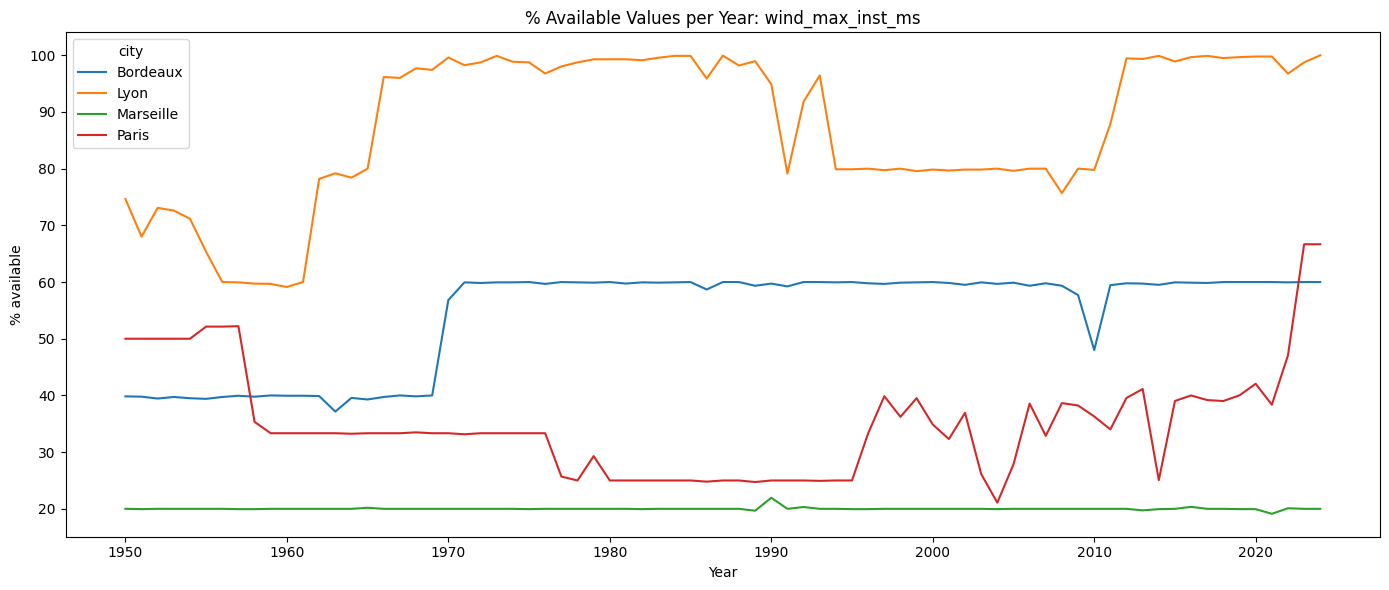

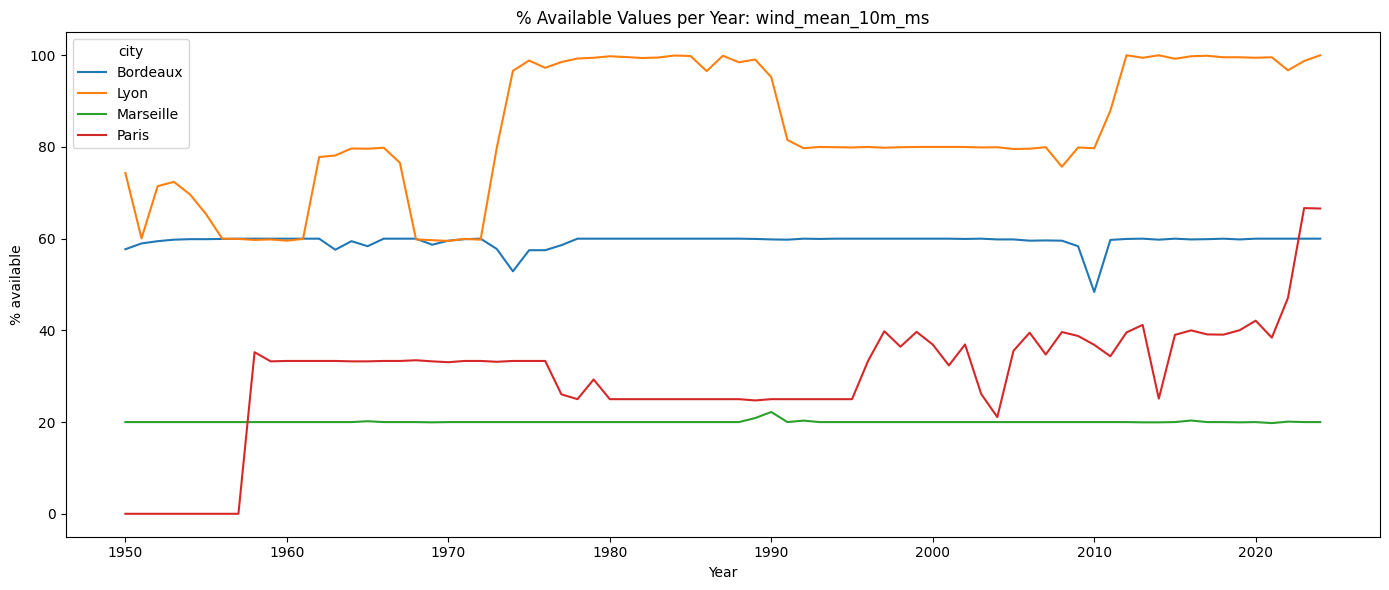

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_lp_avail_data_by_city(data, col="wind_max_inst_ms"):
    """Show line plot of available wind data by city for a variable""" 
    availability = (
        wind[col]
        .notna()                                # True = vorhanden
        .groupby(level="city")
        .resample("YS", level="date")           # jährlich
        .mean()
        .mul(100)
        .rename("availability_pct")
        .reset_index()
    )
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=availability, x="date", y="availability_pct", hue="city")
    plt.ylabel("% available")
    plt.xlabel("Year")
    plt.title(f"% Available Values per Year: {col}")
    plt.tight_layout()
    plt.show()

show_lp_avail_data_by_city(wind, col="wind_max_inst_ms")
show_lp_avail_data_by_city(wind, col="wind_mean_10m_ms")